# KNN binary classification
orange, grapefruits

1. data preparation

In [6]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

SEED = 42

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

In [ ]:
np.random.seed(SEED) # seed는 셀 안에서만 고정이다
np.random.random()

0.3745401188473625

In [ ]:
citrus = pd.read_csv('citrus.csv')
citrus.info()
citrus.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


(10000, 6)

In [ ]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df = citrus.copy() # 원본 데이터는 유지하기 위함. 판다스에서는 그냥 copy 써도 깊은 복사임. 얕은 복사 하고 싶으면 deep 파라미터 사용하기.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


# 범주형 데이터

In [ ]:
df['name'].nunique() # 고유한 데이터의 개수를 반환함. 그래서 몇개의 카테고리로 이루어져 있는지 확인할 수 있음.

2

In [ ]:
df['name'].value_counts() # 데이터가 어느 쪽에 치우치지 않았나 보기 위해서

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

<Axes: xlabel='name'>

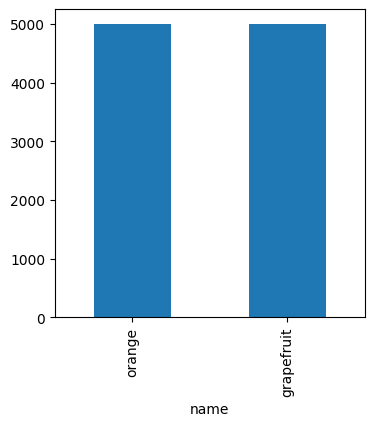

In [ ]:
df['name'].value_counts().plot(kind='bar', figsize=(4,4))

# 연속형 변수

(array([  2.,   0.,   0.,   0.,   0.,   1.,   3.,   1.,   1.,   2.,   4.,
          5.,   9.,   9.,   7.,  12.,  11.,  14.,  14.,  28.,  25.,  25.,
         23.,  38.,  42.,  49.,  49.,  54.,  57.,  46.,  79.,  80., 117.,
        102.,  95., 117., 130., 140., 122., 127., 141., 140., 165., 164.,
        138., 170., 167., 127., 165., 134., 138., 140., 137., 127., 115.,
         94., 105., 109.,  93.,  83.,  76.,  95.,  78.,  62.,  55.,  49.,
         51.,  38.,  32.,  27.,  29.,  17.,  25.,  15.,  11.,  10.,   7.,
          5.,   6.,   2.,   2.,   1.,   3.,   4.,   1.,   0.,   1.,   1.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 86.76  ,  88.2033,  89.6466,  91.0899,  92.5332,  93.9765,
         95.4198,  96.8631,  98.3064,  99.7497, 101.193 , 102.6363,
        104.0796, 105.5229, 106.9662, 108.4095, 109.8528, 111.2961,
        112.7394, 114.1827, 115.626 , 117.0693, 118.5126, 119.9559,
        121.3992, 122.8425, 124.2858, 125.7291

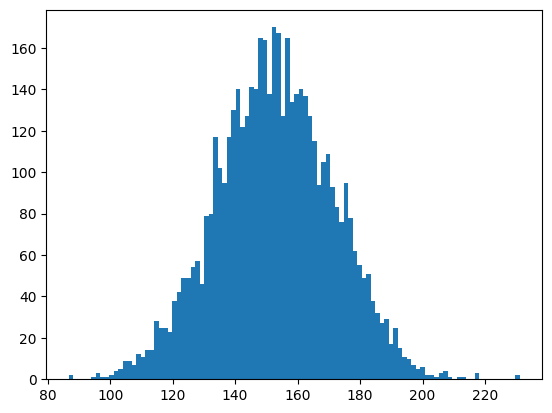

In [ ]:
df_orange = df[df['name'] == 'orange']
plt.hist(df_orange['weight'], bins=100) # 100개의 간격으로 나눠 준다

In [ ]:
df_citrus = df[df['name'] != 'orange']
df_citrus.head()

,name,diameter,weight,red,green,blue
5000,grapefruit,7.63,126.79,150,74,24
5001,grapefruit,7.69,133.98,150,43,15
5002,grapefruit,7.72,135.56,150,54,21
5003,grapefruit,7.77,135.62,150,75,15
5004,grapefruit,7.84,136.63,149,77,20


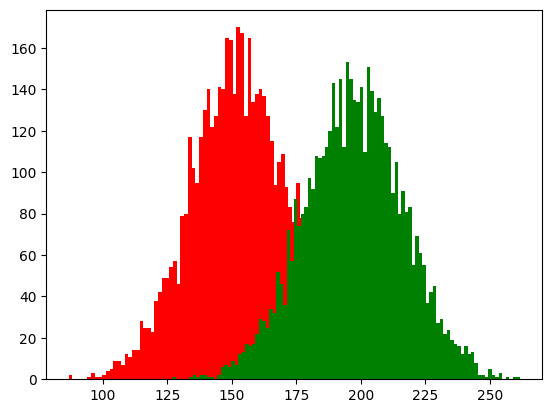

In [ ]:
plt.hist(df_orange['weight'], color= 'r', bins=100)
plt.hist(df_citrus['weight'], color= 'g', bins=100)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac70bd5de70>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac70bd5e3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac70bd5dbd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ac70bd5e8f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ac70bd5eb90>,
 'means': []}

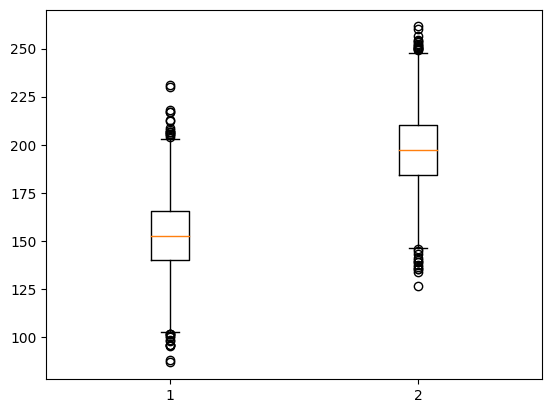

In [ ]:
plt.boxplot([df_orange['weight'], df_citrus['weight']])

In [ ]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac70b036ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac70b037340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac70b036c20>,
 'medians': [<matplotlib.lines.Line2D at 0x7ac70b037880>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ac70b037b20>,
 'means': []}

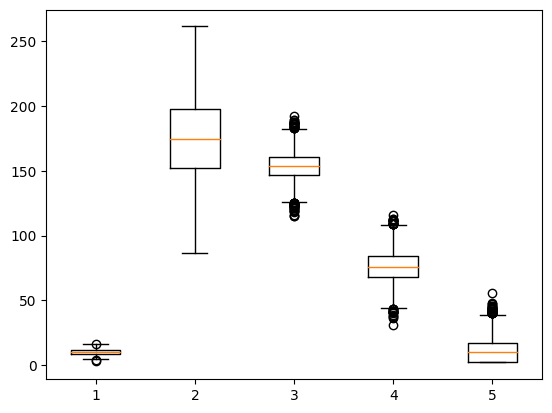

In [ ]:
plt.boxplot(df[['diameter', 'weight', 'red', 'green', 'blue']]) # 연속형 변수들의 이상치가 있나 확인하기 위해 boxplot을 찍어본다

# missing value

In [ ]:
df.isna().sum(axis=0) # 결측치 확인

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
df.duplicated().sum() # 중복치 확인

0

In [ ]:
df = df.sample(frac=1) # 데이터의 편중을 막기 위해 데이터끼리 섞어줌 1이면 전부를, 0.5면 전체중 반을 무작위로 골라서 섞어줌.
df.head()

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


In [ ]:
idx_train = int(len(df) * 0.6) # 6:2:2로 나눠서 학습
idx_val = int(len(df) * 0.8)

In [ ]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]
print(train.shape, val.shape, test.shape)

(6000, 6) (2000, 6) (2000, 6)


## X, y 변수 분리

In [ ]:
X_train = train.drop('name', axis=1)
y_train = train['name']
X_val = val.drop('name', axis=1)
y_val = val['name']

In [ ]:
y_train.value_counts(), y_val.value_counts()

(name
 orange        3062
 grapefruit    2938
 Name: count, dtype: int64,
 name
 grapefruit    1042
 orange         958
 Name: count, dtype: int64)

스케일링

In [ ]:
X_train.head()

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


In [ ]:
u = X_train.mean(); u

diameter      9.933920
weight      174.431958
red         154.092833
green        76.101833
blue         11.238000
dtype: float64

In [ ]:
std = X_train.std(); std

diameter     1.949700
weight      29.219868
red         10.514798
green       11.764135
blue         8.991412
dtype: float64

In [ ]:
u, std

(diameter      9.933920
 weight      174.431958
 red         154.092833
 green        76.101833
 blue         11.238000
 dtype: float64,
 diameter     1.949700
 weight      29.219868
 red         10.514798
 green       11.764135
 blue         8.991412
 dtype: float64)

In [ ]:
X_train_s = (X_train - u) / std
X_val_s = (X_val - u) / std

In [ ]:
ss_dic = {'mean': u, 'std': std}
ss_dic

{'mean': diameter      9.933920
 weight      174.431958
 red         154.092833
 green        76.101833
 blue         11.238000
 dtype: float64,
 'std': diameter     1.949700
 weight      29.219868
 red         10.514798
 green       11.764135
 blue         8.991412
 dtype: float64}

# 인코딩

In [ ]:
label_dict = {'orange':0, 'grapefruit':1}

In [ ]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict) # 그냥 이렇게만 하면 알아서 저거에 맞게 인코딩이 됨.

In [ ]:
X_train_s = X_train_s.to_numpy()
X_val_s = X_val_s.to_numpy()
y_train_e = y_train_e.to_numpy()
y_val_e = y_val_e.to_numpy() # 계산을 위해서는 ndarray로 변경을 해야 함.

# X_train_s = X_tran_s.values 로도 numpy array로 변경 가능함.

# 모델 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train_s, y_train_e) # 이 두개로 학습을 진행하고 학습이 끝나면


KNeighborsClassifier()

# 검증

In [ ]:
y_pred = clf.predict(X_val_s) # validation data로 결과를 뽑아서
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
y_val_e

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
(y_pred == y_val_e).mean() # 두개가 같은지 비교한다. 어차핑 0이랑 1이니까 이걸로 평균내면 정확도를 알 수 있음.

0.924

# 테스트

In [ ]:
X_test = test.drop('name', axis=1)
y_test = test['name']
X_test_s = (X_test - u) / std
y_test_e = y_test.map(label_dict)

In [ ]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
(y_pred == y_test_e).mean()

0.917

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cfm = confusion_matrix(y_test_e, y_pred)
cfm

array([[896,  84],
       [ 82, 938]])

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

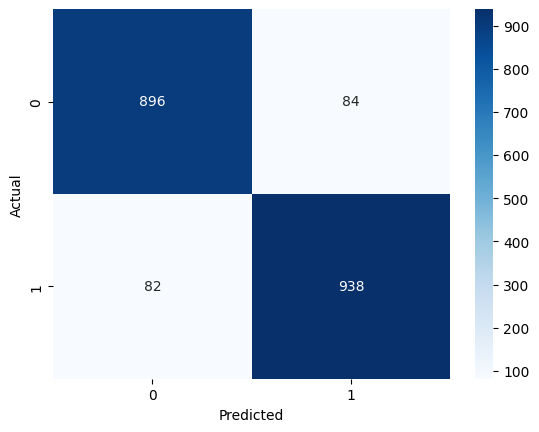

In [ ]:
s = sns.heatmap(cfm, annot=True, cmap= 'Blues', fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
print('accuracy: ', accuracy_score(y_test_e, y_pred))
print('recall: ', recall_score(y_test_e, y_pred))
print('precision: ', precision_score(y_test_e, y_pred))
print('f1: ', f1_score(y_test_e, y_pred))

accuracy:  0.917
recall:  0.9196078431372549
precision:  0.9178082191780822
f1:  0.9187071498530851
